# Data Science and Business Analytics Internship
## GRIP @ The Sparks Foundation
### BY: PUTRI SABRINA



# TASK 4 - Exploratory Data Analysis on dataset 'Global Terrorism'
Performing Exploratory Data Analysis on the dataset "Global Terrorism", hot zones can be located and as security or defense analysts these zones can be rectified.

# STEP 0 - Import the Required Libraries

In [293]:
# Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [318]:
# Loading the dataset
df=pd.read_csv("globalterrorismdb_0718dist.csv", low_memory=False, encoding='latin-1')

In [319]:
print("Showing part of the whole dataset:")
df.head(5)

Showing part of the whole dataset:


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# STEP 1 - Common Dataset Exploration

In [296]:
# Checking for shape
df.shape

(181691, 135)

In [297]:
# Checking for any duplicate values
df.duplicated().sum()

0

In [298]:
# Checking common information for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [299]:
# Looking for short description of dataset
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [300]:
# Checking for column names
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [301]:
# Checking for missing data
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

Through this we will realize that there are in fact lots of missing values

In [302]:
# Checking the percentage of missing values
missing_percentage = df.isnull().sum()*100 /len(df)
print(missing_percentage)

eventid        0.000000
iyear          0.000000
imonth         0.000000
iday           0.000000
approxdate    94.914993
                ...    
INT_LOG        0.000000
INT_IDEO       0.000000
INT_MISC       0.000000
INT_ANY        0.000000
related       86.219461
Length: 135, dtype: float64


In [303]:
# Missing value
missing_data = data.isnull()
missing_data.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
1,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
2,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
3,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
4,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True


In [304]:
# Check for missing dataset shape
missing_data.shape

(181691, 135)

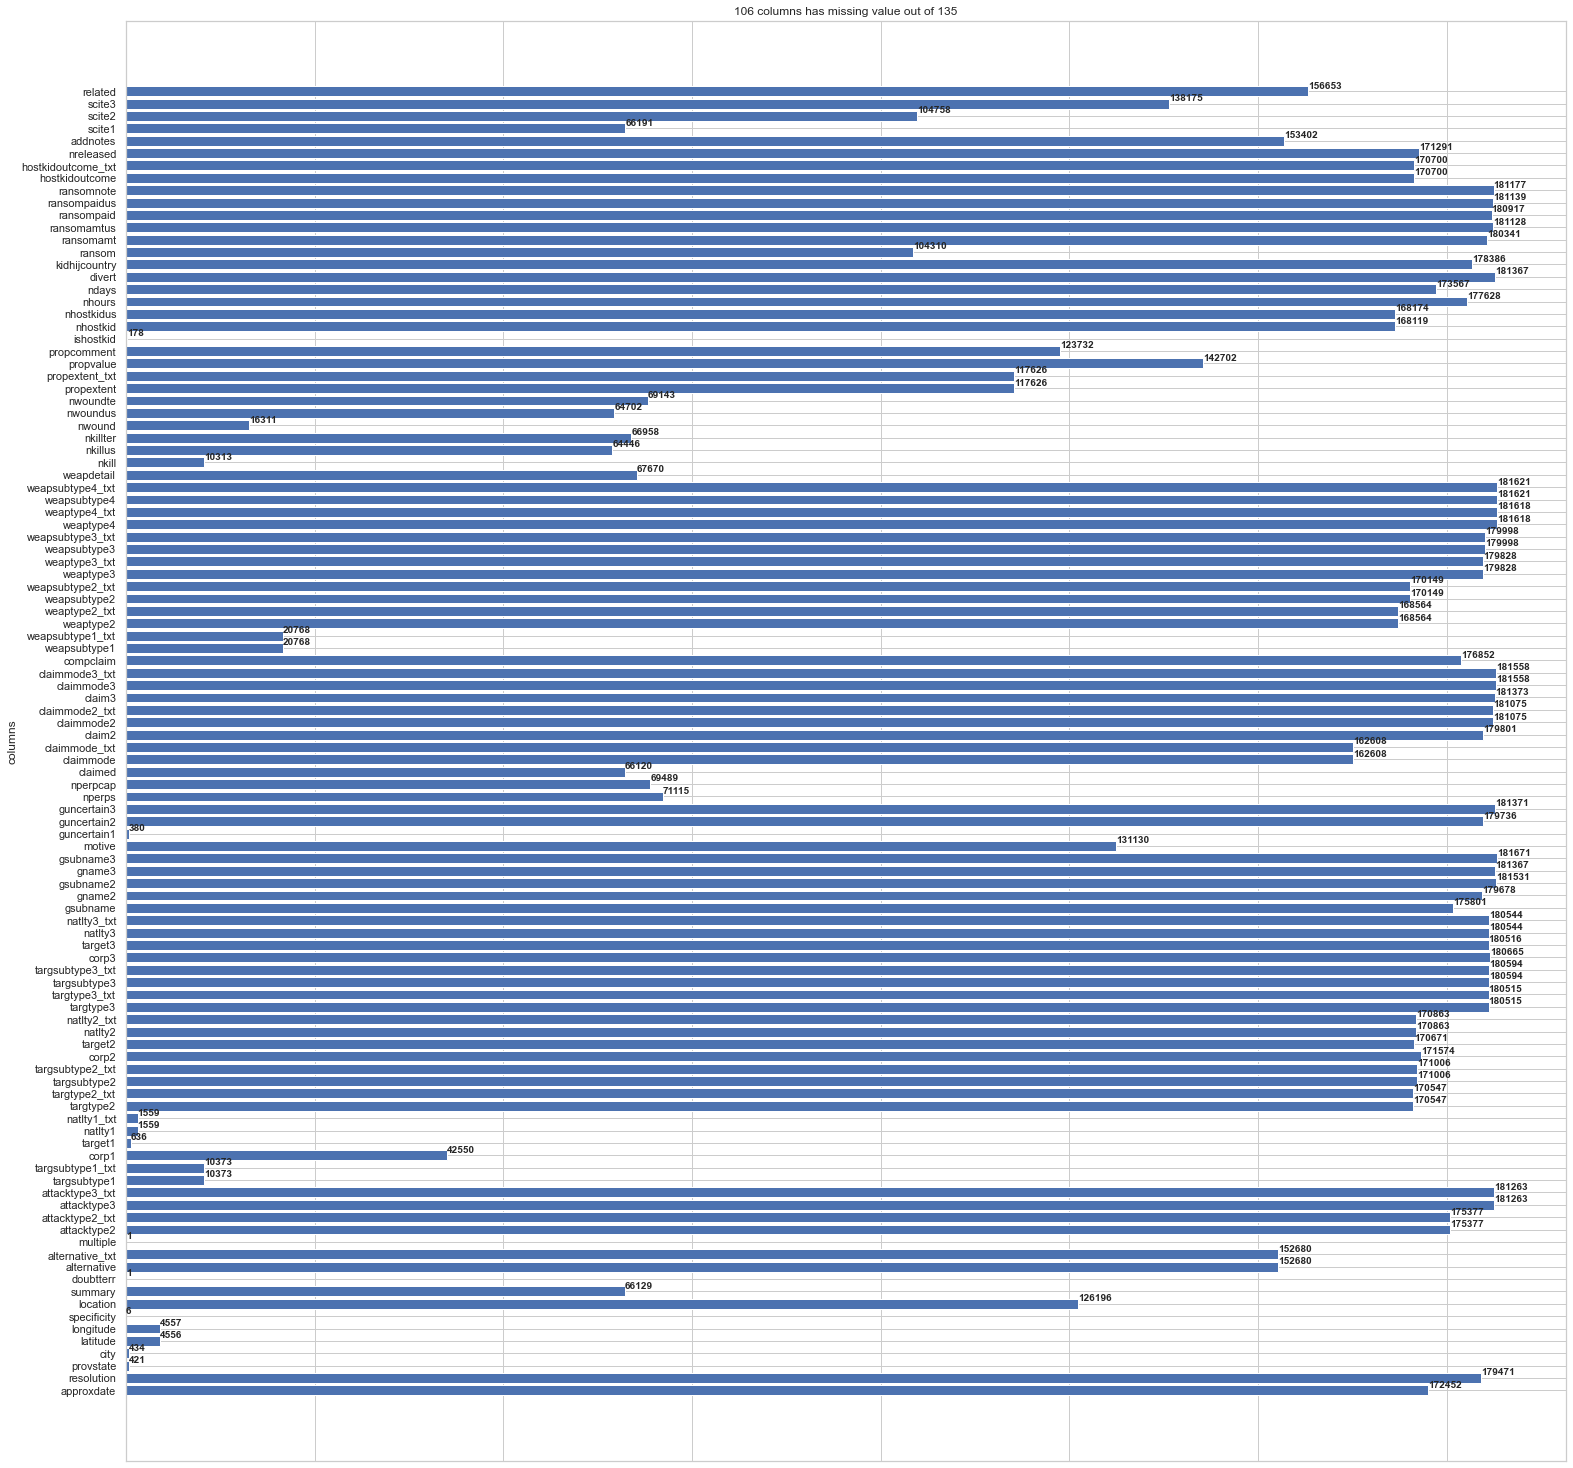

In [305]:
# Finding missing value
colm=[]
value=[]

for col in missing_data.columns.values.tolist():
    
    if missing_data[col].value_counts().shape==(2,):
        colm.append(col)
        value.append(missing_data[col].value_counts()[1])
fig1 = plt.figure(figsize=())
ax = fig1.add_axes([0,0,1,1])
# axes coordinates are 0,0 is bottom left and 1,1 is upper right
ax.barh(colm,value)

for i, v in enumerate(value):
    ax.text(v + 4, i + .25, str(v), fontweight='bold')
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)  

ax.set_title('{} columns has missing value out of {}'.format(len(colm), data.shape[1]))
ax.set_ylabel("columns")

plt.show()

In [357]:
print('Out of {} there are {} columns with missing value'.format(data.shape[1],len(colm)))

Out of 135 there are 106 columns with missing value


# STEP 2 - Visualizaton

## A. MOST ATTACKED COUNTRIES

### BAR PLOT

In [353]:
country = df1.head(10)

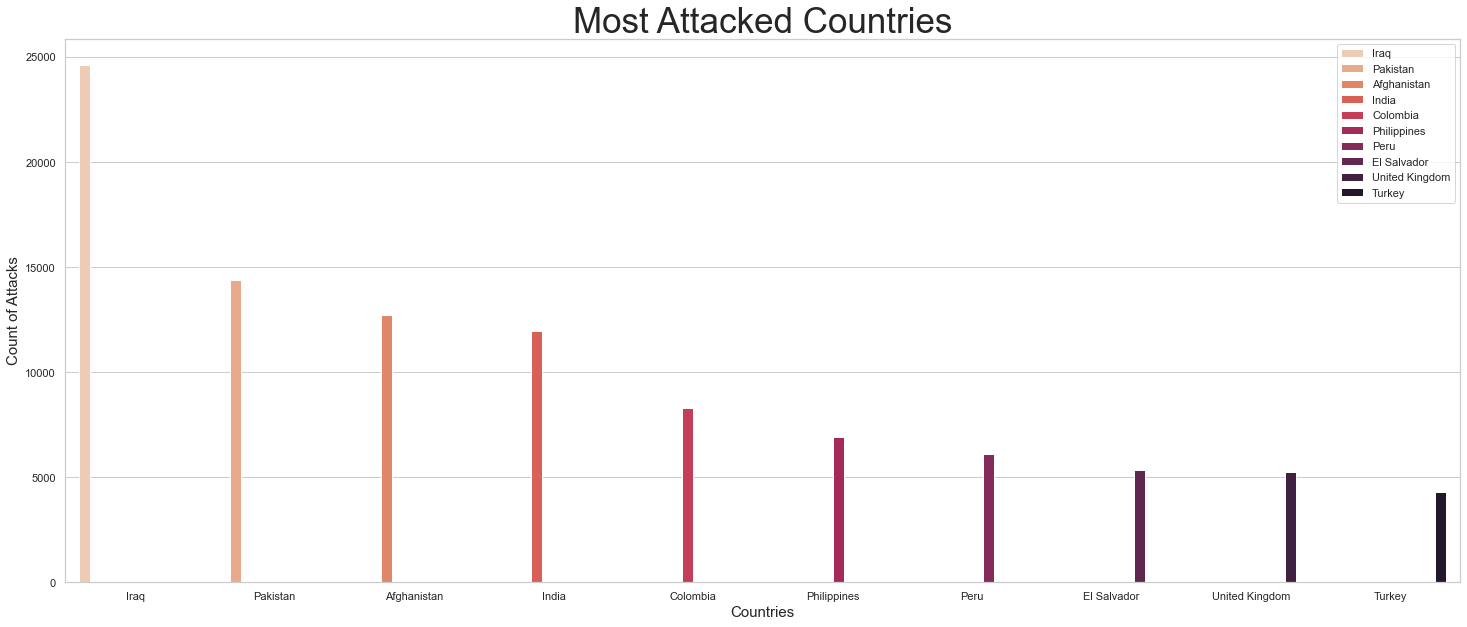

In [356]:
fig,ax = plt.subplots(figsize=(25, 10))
sns.barplot(x="Country Name", y="Count of Attacks", data=country, palette="rocket_r", hue="Country Name")
ax.set_ylabel(ylabel = 'Count of Attacks', fontsize = 15)
ax.set_xlabel(xlabel = 'Countries', fontsize = 15)
ax.set_title('Most Attacked Countries',fontsize=35)
ax.legend();

Based on the graph above, it can be seen that Iraq has the highest number of attacks followed by Pakistan, Afganistan, and so on.

### PIE CHART

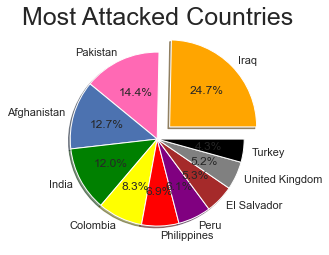

Iraq has the highest attacks with percentage of 24.7%


In [332]:
plt.title('Most Attacked Countries',fontsize=25)
explode = (0.2,0,0,0,0,0,0,0,0,0)
mycolors=["orange","hotpink","b","green","yellow","red","purple","brown","grey","black"]
plt.pie(country['Count of Attacks'], labels=top_10['Country Name'],shadow=True,explode=explode,colors=mycolors,autopct='%1.1f%%')
plt.show()
print("Iraq has the highest attacks with percentage of 24.7%")

## B. MOST ATTACKED CITY

In [328]:
top_city = df.city.value_counts().reset_index().rename(columns={'index': 'City Name'})
top_city.columns.values[1] = 'Count of Attacks'
top_city = top_city.head(10)

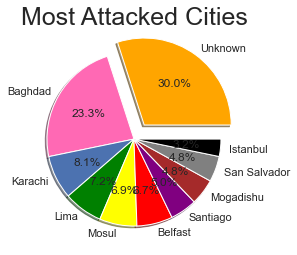

In [333]:
plt.title('Most Attacked Cities',fontsize=25)
explode = (0.2,0,0,0,0,0,0,0,0,0)
mycolors=["orange","hotpink","b","green","yellow","red","purple","brown","grey","black"]
plt.pie(top_city['Count of Attacks'], labels=top_city['City Name'],shadow=True,explode=explode,colors=mycolors,autopct='%1.1f%%')
plt.show()

## C. MOST TARGETED PLACES

No handles with labels found to put in legend.


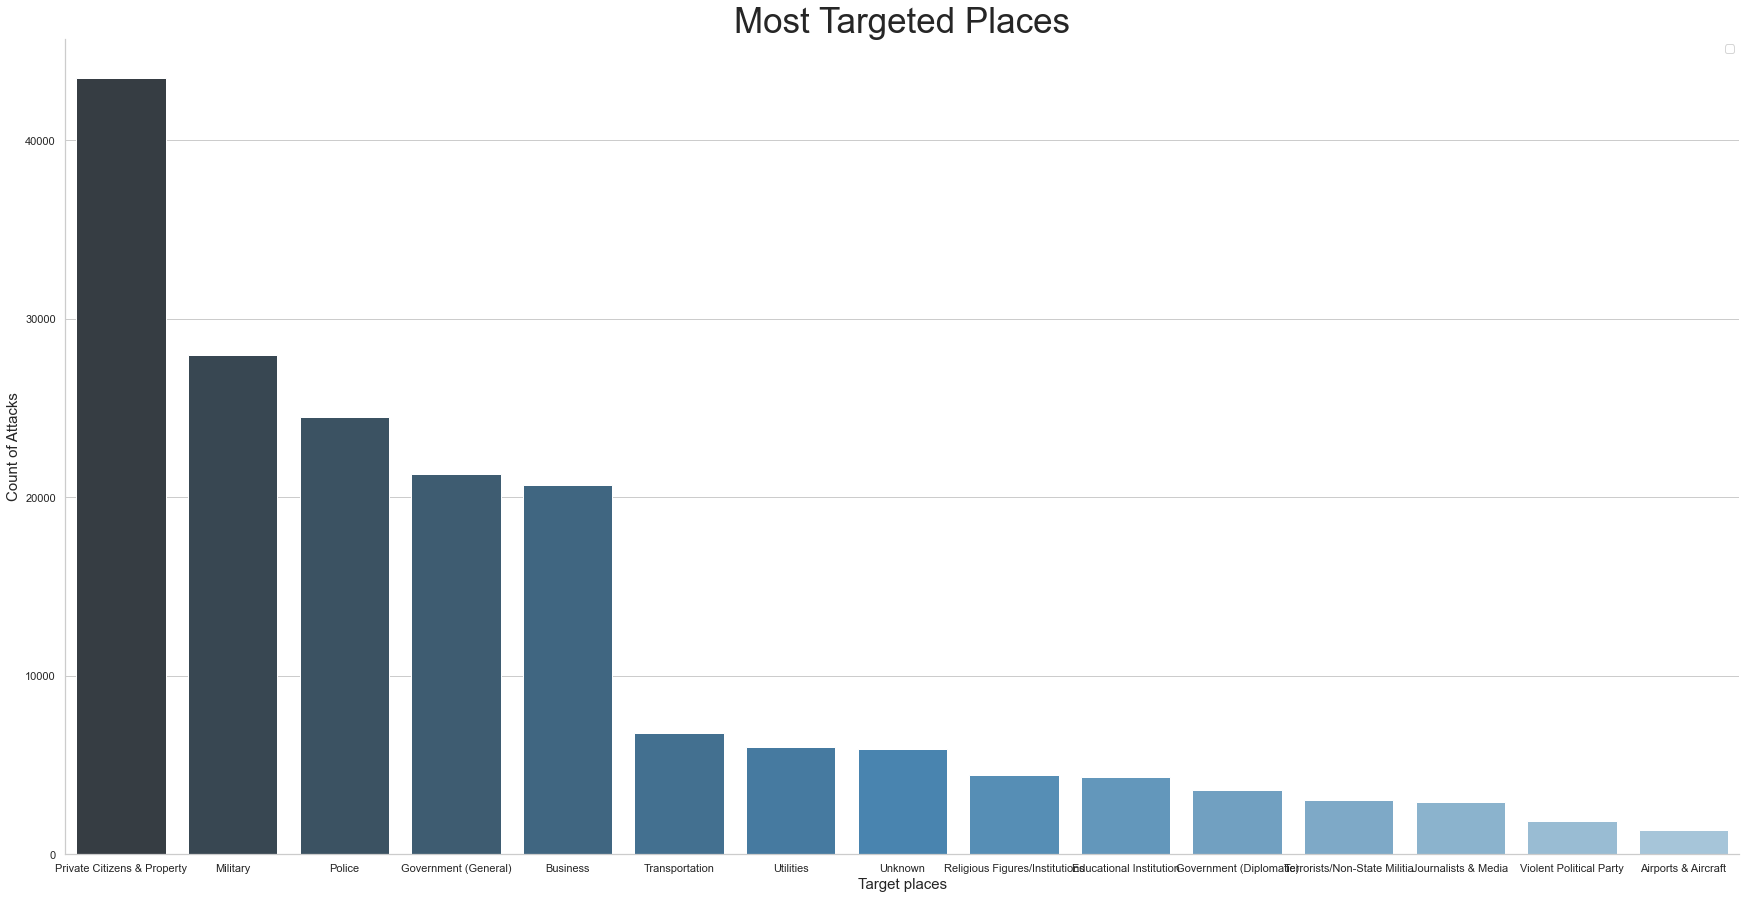

In [311]:
target_type= df['targtype1_txt'].value_counts().reset_index().rename(columns={'index': 'Target Types'})
target_type.columns.values[1] = 'Count'

fig,ax = plt.subplots(figsize=(30, 15))
sns.despine()

sns.barplot(x="Target Types",y="Count",data=target_type.head(15),palette="Blues_d")

ax.set_title('Most Targeted Places',fontsize=35)
ax.set_ylabel(ylabel = 'Count of Attacks',fontsize = 15)
ax.set_xlabel(xlabel = 'Target places',fontsize = 15)

ax.legend();


More than 4000 attacks are mostly targeted private citizens and property.

## D. NUMBER OF TERRORIST ATTACKS PER YEAR

In [ ]:
years= df['iyear'].value_counts().reset_index()
years.columns.values[1] = 'Count of Attacks'
years.head()

## E. MOST USED WEAPONS

In [325]:
weapons= df['weaptype1_txt'].value_counts().reset_index()
weapons.columns.values[1] = 'Count of Attacks'

No handles with labels found to put in legend.


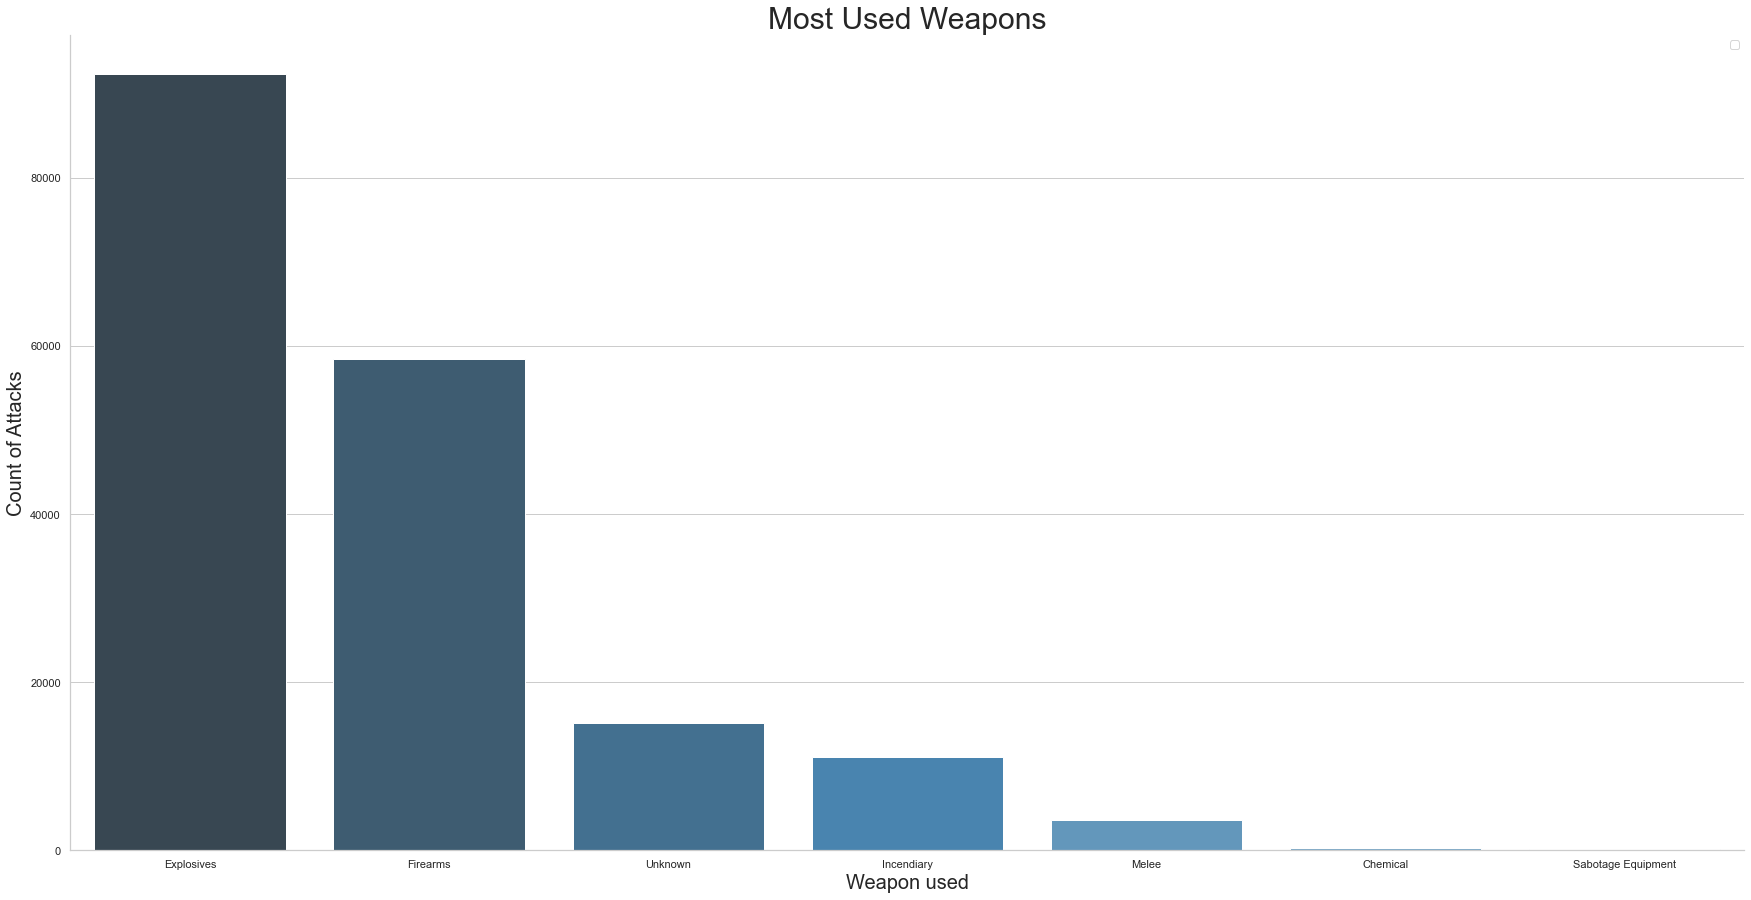

In [327]:
sns.set(style='whitegrid')
fig,ax = plt.subplots(figsize=(30,15))
sns.despine()
sns.barplot(x="index", y="Count of Attacks", data=weapons.head(7),palette="Blues_d")

ax.set_title('Most Used Weapons',fontsize=30)
ax.set_ylabel(ylabel = 'Count of Attacks', fontsize =20)
ax.set_xlabel(xlabel = 'Weapon used', fontsize =20)

ax.legend();

The illustration above shows that explosives and firearms are mostly used for weapons.

## STEP 3 - STATEMENT

- Iraq ranked first on the global terrorism for their terrorist activity followed by Pakistan, Afganistan, India, and so on 
- Most targeted areas are private citizens and property, military, police, and so on
- Global terror attack deaths rose sharply starting year 2011
- In conclusion with the ranking, Iraq suffered from most terrorist attacks in 2014, with  the most deaths in that year